In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import scipy as sp
import scipy.special 
import matplotlib.pyplot as plt
import matplotlib.animation as anim

/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jsturdy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:52: Comp

<IPython.core.display.Javascript object>


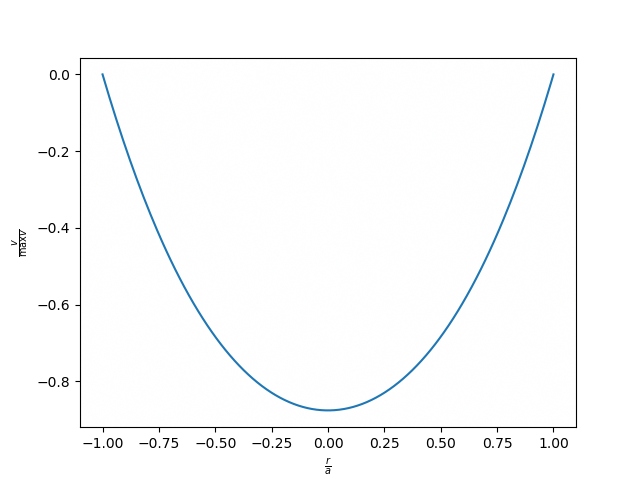

<IPython.core.display.Javascript object>


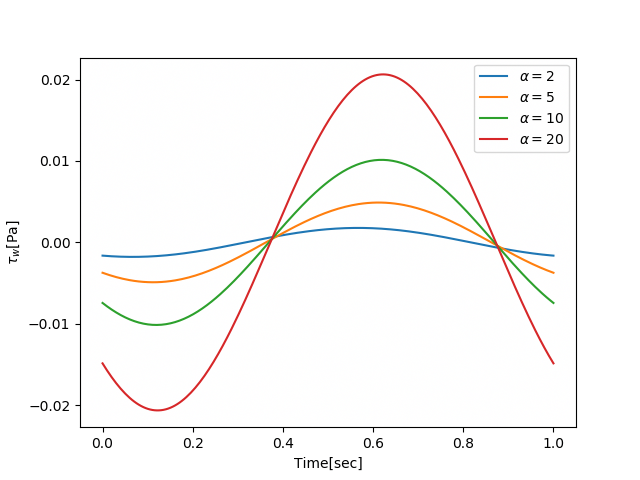

In [56]:

##--------------------- VARIABLES/CONSTANTS -------------------------#
a=0.5e-2
mu=1.05e-3
T=1
f=1/T
w=2*np.pi*f
rho=1e3

Ns = 100                      #-Radial resolution
Nt = 200                      #-Number of time levels
Np = 1                        #-Number of periods
Tmin=0.0  
Tmax=Np*T
r = np.linspace(0,a,Ns)          #-Make radial vector r
t = np.linspace(Tmin,Tmax,Nt)    #-Make time vector t
alpha = np.sqrt(rho*w/mu)*a      #-Womersley number
p0=1.0
dp = p0*np.exp(1j*w*t)           #-Make a time varying complex pressure 
                                 # vector dp/dz(w,t), use a constant 
                                 # amplitude p0=1.0

##                                
#------ CALCULATE WOMERSLEY PROFILES WITH BESSEL FUNCTIONS ----------#
v2 = np.empty((Nt,Ns))
tau2 = np.empty((Nt,))
v5 = np.empty((Nt,Ns))
tau5 = np.empty((Nt,))
v10 = np.empty((Nt,Ns))
tau10 = np.empty((Nt,))
v20 = np.empty((Nt,Ns))
tau20 = np.empty((Nt,))
for i in range(Nt):
#v(i,:)=...#                    #-Use the built in scipy function
                                # sp.special.jn(nu,Z) to calculate the Bessel
                                # functions needed to find an expression 
                                # for the velocity vector v(i,:) as a 
                                # function of the pressure function p(i). 
    alpha=2
    v2[i,:] = (1j/w/rho)*dp[ i ]*(1-sp.special.jn(0,1j**(1.5)*alpha*r/a)/sp.special.jn(0,1j**(1.5)*alpha))
    tau2[i] = -mu*1j**(5/2)*alpha*dp[i]*sp.special.jn(1,1j**(1.5)*alpha)/sp.special.jn(0,1j**(1.5)*alpha)

    alpha=5
    v5[i,:] = (1j/w/rho)*dp[ i ]*(1-sp.special.jn(0,1j**(1.5)*alpha*r/a)/sp.special.jn(0,1j**(1.5)*alpha))
    tau5[i] = -mu*1j**(5/2)*alpha*dp[i]*sp.special.jn(1,1j**(1.5)*alpha)/sp.special.jn(0,1j**(1.5)*alpha)
   
    alpha=10
    v10[i,:] = (1j/w/rho)*dp[ i ]*(1-sp.special.jn(0,1j**(1.5)*alpha*r/a)/sp.special.jn(0,1j**(1.5)*alpha))
    tau10[i] = -mu*1j**(5/2)*alpha*dp[i]*sp.special.jn(1,1j**(1.5)*alpha)/sp.special.jn(0,1j**(1.5)*alpha)
    
    alpha=20
    v20[i,:] = (1j/w/rho)*dp[ i ]*(1-sp.special.jn(0,1j**(1.5)*alpha*r/a)/sp.special.jn(0,1j**(1.5)*alpha))
    tau20[i] = -mu*1j**(5/2)*alpha*dp[i]*sp.special.jn(1,1j**(1.5)*alpha)/sp.special.jn(0,1j**(1.5)*alpha)


#-------------------- PLOT WOMERSLEY PROFILES -----------------------#
p    = np.real(dp)/p0
vmax = np.max(np.real(v2))
v2    = np.real(v2)/vmax
vmax = np.max(np.real(v5))
v5    = np.real(v5)/vmax
vmax = np.max(np.real(v10))
v10    = np.real(v10)/vmax
vmax = np.max(np.real(v20))
v20    = np.real(v20)/vmax
r = np.concatenate((-r[Ns::-1], r))           #-Make r a vector from -a to a
v2 = np.concatenate((v2[:,Ns::-1],v2),axis=1)
v5 = np.concatenate((v5[:,Ns::-1],v5),axis=1)
v10 = np.concatenate((v10[:,Ns::-1],v10),axis=1)
v20 = np.concatenate((v20[:,Ns::-1],v20),axis=1)

# Plot single time point
plt.figure()
plt.plot(r/a, v2[5,:])
plt.xlabel(r"$\frac{r}{a}$")
plt.ylabel(r"$\frac{v}{\max v}$")
plt.show()



# Plot wall shear stress
plt.figure()
plt.plot(t, tau2, label=r'$\alpha=2$')
plt.plot(t, tau5, label=r'$\alpha=5$')
plt.plot(t, tau10, label=r'$\alpha=10$')
plt.plot(t, tau20, label=r'$\alpha=20$')
plt.xlabel(r"Time[sec]")
plt.ylabel(r"$\tau_w$[Pa]")
plt.legend()
plt.savefig("tau_w.png")
plt.show()




<IPython.core.display.Javascript object>


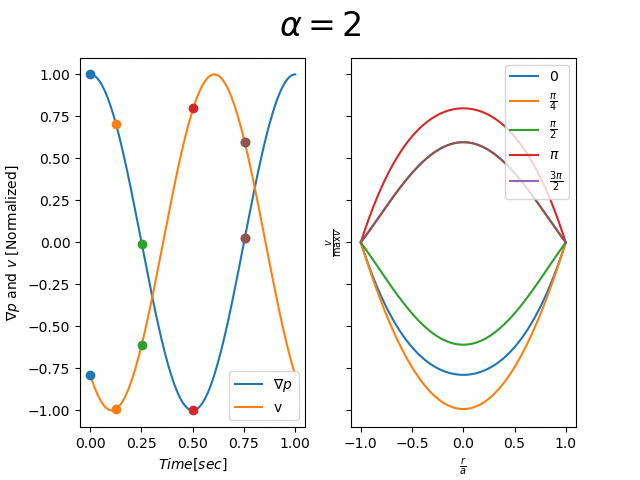

<IPython.core.display.Javascript object>


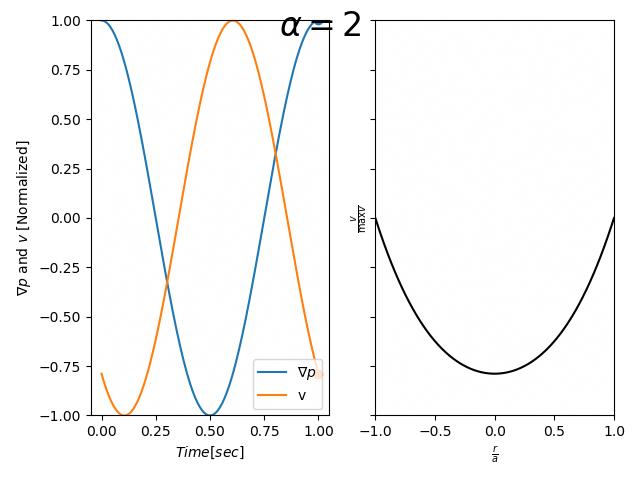

/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


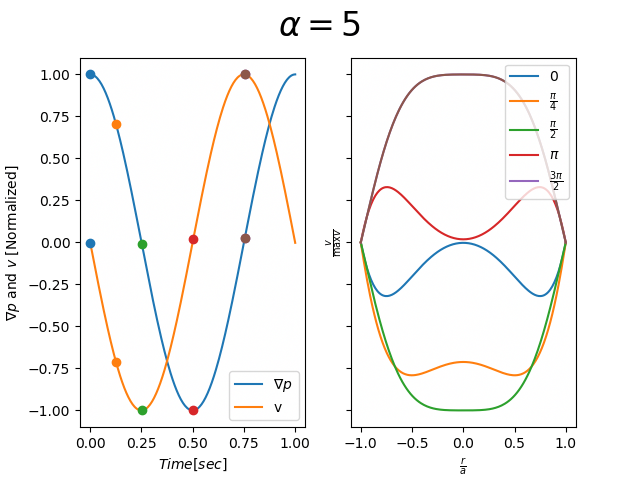

<IPython.core.display.Javascript object>


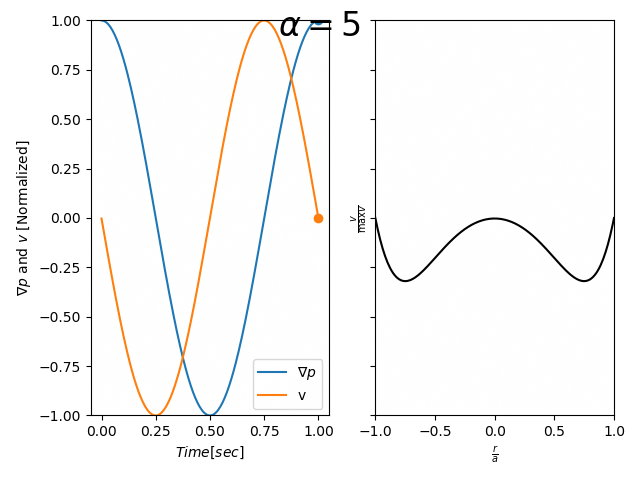

/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


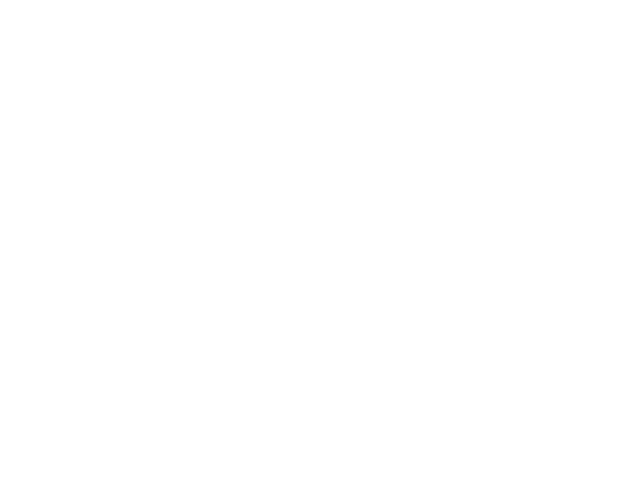

<IPython.core.display.Javascript object>


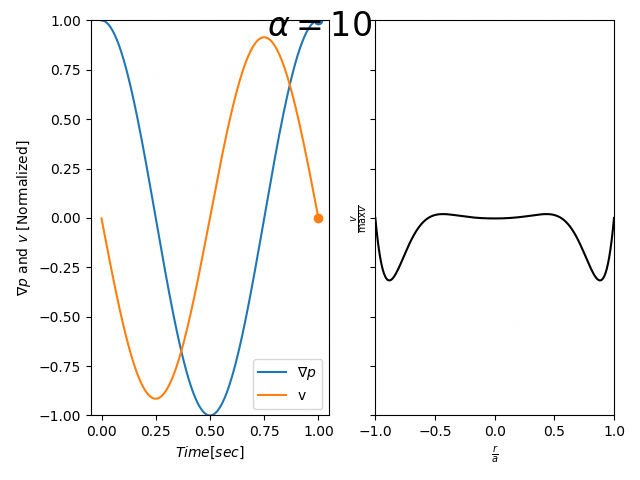

/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


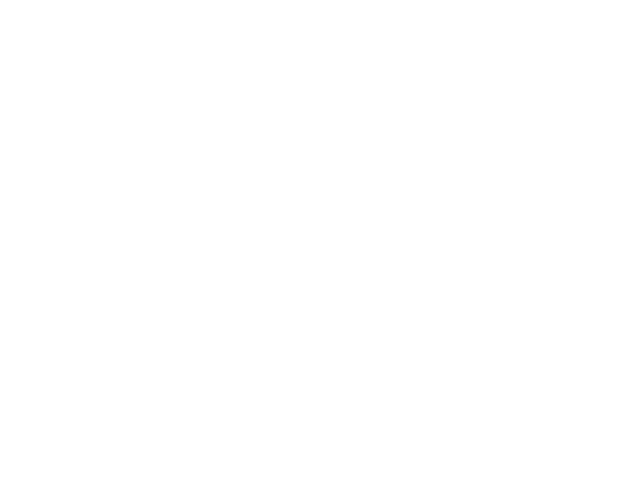

<IPython.core.display.Javascript object>


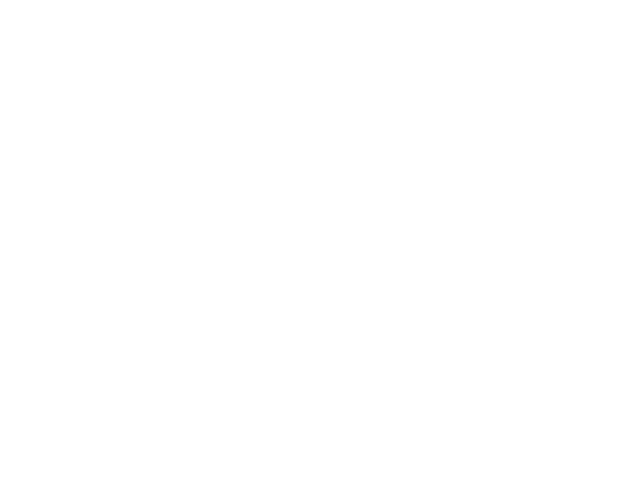

/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jsturdy/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [58]:
plt.close("all")
# Phase and time plots
v_plot = v2
alphas = [2, 5, 10, 20]
v_tuple = (v2, v5, v10, v20)
for alpha_idx, v_plot in enumerate((v2, v5, v10, v20)):
# Choose 0, pi/4, pi/2, pi, and 3pi/2
    fig1, ax = plt.subplots(1,2, sharey=True)
    v_center = v_plot[:,Ns]
    ax[0].plot(t,p,label=r"$\nabla p$")
    ax[0].plot(t,v_center,label="v")
    ax[0].legend()
    ax[0].set_xlabel(r'$Time[sec]$')
    ax[0].set_ylabel(r'$\nabla p$ and $v$ [Normalized]')
    
    fig1.suptitle('$\\alpha=%d$'%alphas[alpha_idx], fontsize=24)

    indices = [0, int(np.floor((Nt/Np)/8)), int(np.floor((Nt/Np)/4)), 
        int(np.floor((Nt/Np)/2)), int(np.floor(3*(Nt/Np)/4)), 
        int(np.floor(3*(Nt/Np)/4))]

    for idx in indices:
      pp, = ax[0].plot(t[idx],p[idx], 'o')
      vp, = ax[0].plot(t[idx],v_center[idx], 'o')
      l, = ax[1].plot(r/a, v_plot[idx,:])
      pp.set_color(l.get_color())
      vp.set_color(l.get_color())

    ax[1].legend((r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\pi$', 
        r'$\frac{3\pi}{2}$'), loc=1)
    ax[1].set_xlabel(r'$\frac{r}{a}$')
    ax[1].set_ylabel(r'$\frac{v}{\max v}$')
    plt.savefig("velocity_%d.png"%alpha_idx)
    plt.show()

# Animation
    fig1, ax = plt.subplots(1,2, sharey=True)
    v_center = v_plot[:,Ns]
    pline, = ax[0].plot(t,p,label=r"$\nabla p$")
    vline, = ax[0].plot(t,v_center,label="v")
    pp, = ax[0].plot(t[0],p[0], 'o')
    pp.set_color(pline.get_color())
    vp, = ax[0].plot(t[0],v_center[0], 'o')
    vp.set_color(vline.get_color())

    l, = ax[1].plot([],[],'-k')
    ax[1].set_xlim((-1,1))
    ax[1].set_ylim((-1,1))    
    ax[1].set_xlabel(r'$\frac{r}{a}$')
    ax[1].set_ylabel(r'$\frac{v}{\max v}$')
    ax[0].legend()
    ax[0].set_xlabel(r'$Time[sec]$')
    ax[0].set_ylabel(r'$\nabla p$ and $v$ [Normalized]')
    plt.tight_layout()
    
    fig1.suptitle('$\\alpha=%d$'%alphas[alpha_idx], fontsize=24)
    def update_plot(idx, data, pressure,  line, pp, vp):
        line.set_data(r[::]/a, data[idx,:])
        vp.set_data(t[idx], data[idx,Ns])
        pp.set_data(t[idx], pressure[idx])
        return line, pp, vp

    line_ani = anim.FuncAnimation(fig1, update_plot, Nt, fargs=(v_plot, dp, l, pp, vp), interval=50, blit=True)
    line_ani.save("velocity_%d.mp4"%alpha_idx,  dpi=300)
    line_ani.save("velocity_%d.mov"%alpha_idx,  dpi=300)
    FFMpegWriter = anim.writers['ffmpeg']
    writer = FFMpegWriter(fps=15, codec='libvpx-vp9')
    line_ani.save("velocity_%d.webm"%alpha_idx,  dpi=300, writer=writer)
    writer = FFMpegWriter(fps=15, codec='libtheora')
    line_ani.save("velocity_%d.ogg"%alpha_idx,  dpi=302, writer=writer)